In [1]:
from spectral_cube import SpectralCube

In [17]:
cube = SpectralCube.read("/orange/adamginsburg/extragalactic/alchemi/Archive/v0/B3d/ngc253.B3d.sc4_1.12mC12mE.106700.contsub.cv01_6.cube.fits")
methcube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=107.013831*u.GHz).spectral_slab(-250*u.km/u.s, 750*u.km/u.s)

In [3]:
import pvextractor

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [5]:
endpoints = SkyCoord(['0:47:34.5914407139 -25:17:07.6634753546', '0:47:31.2839586692 -25:17:34.1991936212'], frame='icrs', unit=(u.h, u.deg))

In [18]:
path = pvextractor.Path(endpoints, width=3*u.arcsec)

In [19]:
pv = pvextractor.extract_pv_slice(methcube, path)

In [20]:
%matplotlib inline
import pylab as pl

In [21]:
from astropy.wcs import WCS

In [23]:
from astropy.visualization import simple_norm

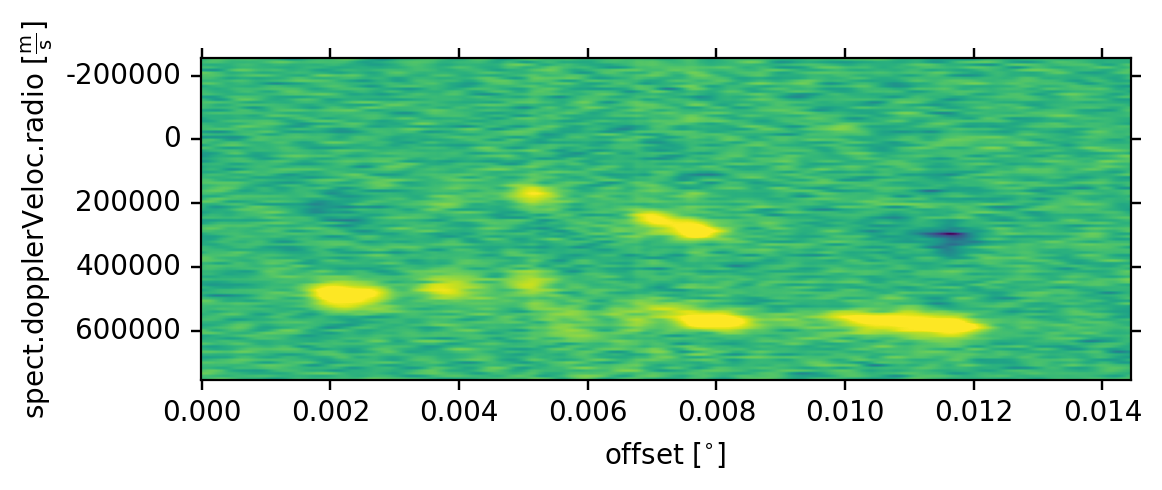

In [26]:
pl.figure(dpi=200)
pl.subplot(projection=WCS(pv.header))
pl.imshow(pv.data, norm=simple_norm(pv.data, stretch='asinh', max_percent=99))